<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Parcial_3/Maxwell_Boltzmann_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maxwell-Boltzmann distribution:** Imagine que es posible medir la velocidad de las moléculas en un gas de nitrógeno. Bajo la suposición equilibrio térmico, se puede estimar la temperatura de este sistema usando la distribución de velocidades de Maxxwell.

(a) Descarge los datos de velocidad: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv')
data.keys()
x_gases=data['Velocidad']
x_gases

,Velocidad
0,547.265773
1,449.920418
2,773.814382
3,823.668389
4,352.873887
...,...
2995,601.470068
2996,508.491149
2997,594.981398
2998,376.388615


(b) Construya el histograma de frecuencia relativa entre la velocidad más pequeña y la más alta; use $n=60$ bines.


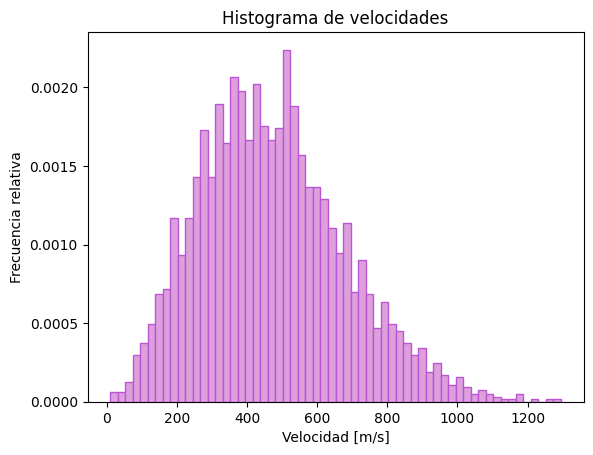

In [ ]:
plt.hist(x_gases, bins=60, density=True, color='plum', edgecolor='mediumorchid')
plt.xlabel("Velocidad [m/s]")
plt.ylabel("Frecuencia relativa")
plt.title("Histograma de velocidades")
plt.show()


(c) Calcule el valor promedio empírico de la velocidad de las moléculas de nitrógeno, es decir, directamente del histograma.


In [ ]:
valor_empirico=np.mean(x_gases)
print(f"Valor empírico es {valor_empirico}")

Valor empírico es 472.17578290610606



(d) Defina la función de Likelihood de este fenómeno:
$f(v)=(\frac{m}{2\pi k_B T})^\frac{3}{2} 4\pi v^2 e^\frac{mv^2}{2k_b T}$


In [ ]:
def likelihood(p, x):
    T = p[0]
    m = 0.028
    Kb = 8.31
    return ((m / (2 * np.pi * Kb * T))**(3/2)) * 4 * np.pi * x**2 * np.exp((-m * x**2) / (2 * Kb * T))

(e) Utilice algún algoritmo de optimización para encontrar el mejor ajuste a los datos. $T \approx 297.89 K$. Dibuje el histograma con el ajuste.


Temperatura ajustada (T): 297.89403 K


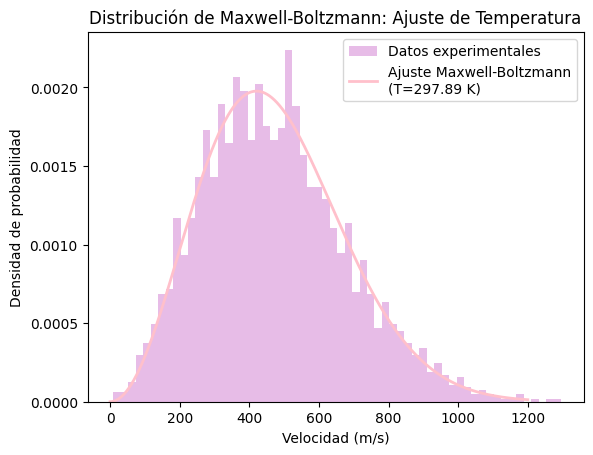

In [ ]:
from scipy.optimize import minimize

def Jointlikelihood(p, x):
    return -np.sum(np.log(likelihood(p, x)))

v=x_gases[x_gases>0]

counts, bins = np.histogram(v, bins=60, density=False)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]


Estado_inicial = [300]
resultado = minimize(Jointlikelihood, Estado_inicial, args=(v,), bounds=[(200, 400)]) # Passing 'v' to Jointlikelihood

T_fit = resultado.x[0]
print(f"Temperatura ajustada (T): {T_fit:.5f} K")

val_x = np.linspace(0, 1200, 3000)
ajuste_no_normalizado = likelihood([T_fit], val_x)
ajuste = ajuste_no_normalizado / np.trapz(ajuste_no_normalizado, val_x)

plt.hist(v, bins=60, density=True, color='plum', alpha=0.7, label="Datos experimentales")
plt.plot(val_x, ajuste, color='pink', label=f"Ajuste Maxwell-Boltzmann\n(T={T_fit:.2f} K)", linewidth=2)
plt.ylabel("Densidad de probabilidad")
plt.xlabel("Velocidad (m/s)")
plt.legend()
plt.title("Distribución de Maxwell-Boltzmann: Ajuste de Temperatura")
plt.show()



(f) Calcule la velocidad más probable: $v_p = \sqrt{\frac{2RT}{M}}$.

In [ ]:
def velocidad_mas_probable(T, x):
    m = 0.028
    R= 8.314
    return np.sqrt((2 * R * T) / m)
velocidad_mas_probable(T_fit, x_gases)
print(f"Velocidad más probable: {velocidad_mas_probable(T_fit, x_gases)} m/s")



Velocidad más probable: 420.6025377360905 m/s




(g) Calcule la velocidad promedio: $v_m=\frac{2}{\sqrt{\pi}} v_p$. Este valor difiere mucho del valor empírico? Explique su razonamiento


In [ ]:
velocidad_promedio=(2/(np.sqrt(np.pi)))*velocidad_mas_probable(T_fit, x_gases)
print(f"Velocidad promedio: {velocidad_promedio} m/s")

Velocidad promedio: 474.5991412089087 m/s


En general, obseravmos una dicreoancia entre la velocidad promedio empírica (472.18 m/s) y la teórica (474.60 m/s), debido a varios factores. En primer lugar, el modelo de Maxwell-Boltzman asume un sistema en equilibrio térmico, lo cual en un sistema real no siempre se cumple. Además, en el modelo empírico se pueden atribuir a limitaciones del modelo y la calidad de los datos, lo que introduce en impresiciones de la estimación. En tercer lugar, el tamaño de las muestras puede ser un factor que está afectando la precisión de la velocidad promedio empírica.


(h) Calcule la velocidad cuadrática media: $\sqrt{<v^2>}= \sqrt{\frac{3RT}{M}}$.


In [ ]:
def velocidad_cuadratica_media(T):
    m = 0.028
    R= 8.314
    return np.sqrt((3 * R * T) / m)
respuesta= velocidad_cuadratica_media(T_fit)
print(f"Velocidad más probable: {respuesta} m/s")

Velocidad más probable: 515.1308009865642 m/s



(i) Utilice el algoritmo de Metrópolis-Hastings para encontrar la función de distribución posterior de este problema. Cúal es el error estándar asociado a la estimación?


In [ ]:
!pip install emcee
!pip install corner

In [ ]:
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt

100%|██████████| 2000/2000 [00:54<00:00, 36.68it/s]


Temperatura media estimada: 304.43 K
Desviación estándar: 4.52 K
Intervalo de confianza del 95%: 296.02 K - 313.47 K


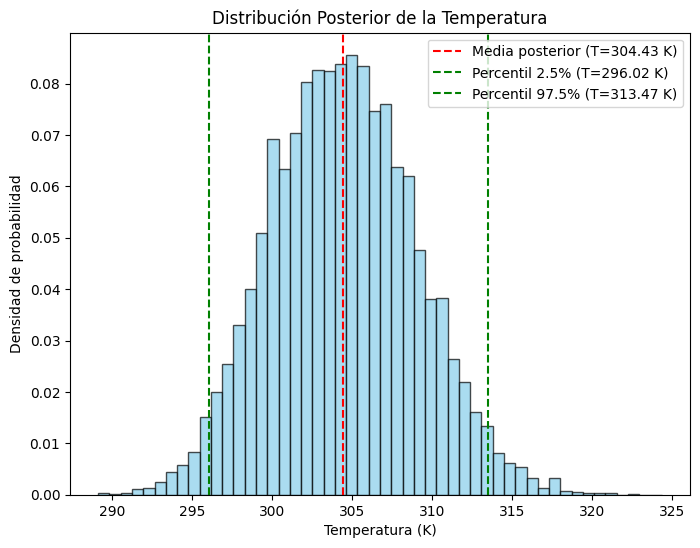

Las temperaturas mayores a 305.6 K NO están excluidas con un 95% de confianza.


In [ ]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

v = x_gases[x_gases > 0]

def log_likelihood(p, v):
    T = p[0]
    if T <= 0:
        return -np.inf
    m = 0.028
    Kb = 8.13
    likelihood = ((m / (2 * np.pi * Kb * T))**(3/2)) * 4 * np.pi * v**2 * np.exp((-m * v**2) / (2 * Kb * T))
    return np.sum(np.log(likelihood + 1e-10))
def log_prior(p):
    T = p[0]
    if 200 <= T <= 400:
        return 0.0
    return -np.inf

def log_posterior(p, v):
    lp = log_prior(p)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(p, v)


ndim = 1
nwalkers = 20
nsteps = 2000
initial_pos = [np.array([300.0]) + 1e-2 * np.random.randn(ndim) for _ in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(v,))
sampler.run_mcmc(initial_pos, nsteps, progress=True)

samples = sampler.get_chain(flat=True)

T_mean = np.mean(samples)
T_std = np.std(samples)
T_95_CI = np.percentile(samples, [2.5, 97.5])


print(f"Temperatura media estimada: {T_mean:.2f} K")
print(f"Desviación estándar: {T_std:.2f} K")
print(f"Intervalo de confianza del 95%: {T_95_CI[0]:.2f} K - {T_95_CI[1]:.2f} K")

# Graficar la distribución posterior de la temperatura
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(T_mean, color='red', linestyle='--', label=f'Media posterior (T={T_mean:.2f} K)')
plt.axvline(T_95_CI[0], color='green', linestyle='--', label=f'Percentil 2.5% (T={T_95_CI[0]:.2f} K)')
plt.axvline(T_95_CI[1], color='green', linestyle='--', label=f'Percentil 97.5% (T={T_95_CI[1]:.2f} K)')
plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución Posterior de la Temperatura")
plt.legend()
plt.show()

# Verificar si temperaturas mayores a 305.6 K están excluidas en el 95% de la posterior
if T_95_CI[1] < 308:
    print("Las temperaturas mayores a 305.6 K están excluidas con un 95% de confianza.")
else:
    print("Las temperaturas mayores a 305.6 K NO están excluidas con un 95% de confianza.")


100%|██████████| 5000/5000 [03:19<00:00, 25.01it/s]


Temperatura media estimada: 297.98 K
Desviación estándar: 4.43 K
Intervalo de confianza del 95%: 289.40 K - 306.73 K


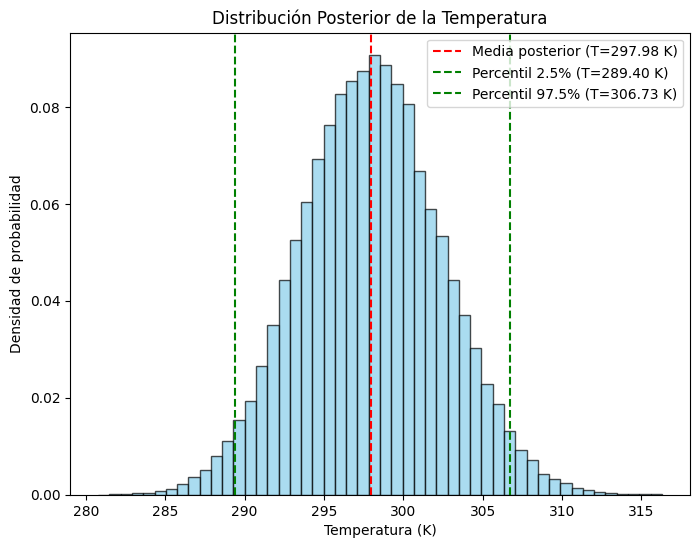

Las temperaturas mayores a 305.6 K están excluidas con un 95% de confianza.


In [ ]:
import numpy as np
import emcee
import matplotlib.pyplot as plt


k_B = 1.38e-23
M = 0.028
N_A = 6.022e23
m = M / N_A

v = x_gases[x_gases > 0]

def log_likelihood(p, v):
    T = p[0]
    if T <= 0:
        return -np.inf

    factor = (m / (2 * np.pi * k_B * T))**(3/2)
    likelihood = factor * 4 * np.pi * v**2 * np.exp((-m * v**2) / (2 * k_B * T))
    return np.sum(np.log(likelihood + 1e-10))  # Evitar log(0)

def log_prior(p):
    T = p[0]
    if 200 <= T <= 400:
        return 0.0
    return -np.inf


def log_posterior(p, v):
    lp = log_prior(p)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(p, v)

ndim = 1
nwalkers = 32
nsteps = 5000
initial_pos = [np.array([300.0]) + 1e-2 * np.random.randn(ndim) for _ in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(v,))
sampler.run_mcmc(initial_pos, nsteps, progress=True)


samples = sampler.get_chain(flat=True)
T_mean = np.mean(samples)
T_std = np.std(samples)
T_95_CI = np.percentile(samples, [2.5, 97.5])

print(f"Temperatura media estimada: {T_mean:.2f} K")
print(f"Desviación estándar: {T_std:.2f} K")
print(f"Intervalo de confianza del 95%: {T_95_CI[0]:.2f} K - {T_95_CI[1]:.2f} K")

plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(T_mean, color='red', linestyle='--', label=f'Media posterior (T={T_mean:.2f} K)')
plt.axvline(T_95_CI[0], color='green', linestyle='--', label=f'Percentil 2.5% (T={T_95_CI[0]:.2f} K)')
plt.axvline(T_95_CI[1], color='green', linestyle='--', label=f'Percentil 97.5% (T={T_95_CI[1]:.2f} K)')
plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución Posterior de la Temperatura")
plt.legend()
plt.show()

if T_95_CI[1] < 308:
    print("Las temperaturas mayores a 308 K están excluidas con un 95% de confianza.")
else:
    print("Las temperaturas mayores a 308 K NO están excluidas con un 95% de confianza.")



(j) Qué modelos de temperatura superiores $\hat{T}$ están excluidos dada la observación? Use un nivel de confianza del 95% para rechazar la hipótesis alternativa. **ANS:** Una temperatura mayor a $T_{up}>305.6K$ está excluida